# **Machine Learning ex-1(Python)**

<bold><p><span style="font-family: Arial; font-size:1.4em;color:blue;">Univariate Linear Regression </p></bold>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank

In [3]:
def read_data(dataset):
    data = pd.read_csv(dataset, header = None)
    data.head()
    X = data.iloc[:, 0].values
    y = data.iloc[:, 1].values
    m = len(y)
    return X, y, m
X, y, m = read_data('ex1data1.txt')

# *Plotting Data*

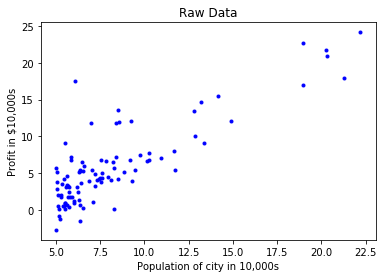

In [4]:
def plotData(X, y):
    plt.scatter(X, y, label='scatter', marker='8', c='b', s=10, alpha=1)
    plt.xlabel('Population of city in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title("Raw Data")
    plt.show()
    
plotData(X, y)

#  *Initializing parameters and adding intercept term*

In [5]:
def initialize(X, y, dims, alpha_, iterations_):
    if(matrix_rank(X) == 1):
        X = X[:, np.newaxis]
    if(matrix_rank(y) == 1):
        y = y[:, np.newaxis]
    m = len(y)
    theta = np.zeros(dims)
    ones = np.ones((m,1))
    X = np.hstack((ones,X))
    alpha = alpha_
    iterations = iterations_
    return X, y, theta, alpha, iterations

In [6]:
X, y, theta, alpha, iterations = initialize(X, y, dims=[2,1], alpha_=0.01, iterations_=1500)
print("Shape of X is: " + str(X.shape))
print("Shape of y is: " + str(y.shape))
print("Initial theta is:" + str(theta))

Shape of X is: (97, 2)
Shape of y is: (97, 1)
Initial theta is:[[0.]
 [0.]]


# *Compute Cost*

In [7]:
def computeCost(X, y, theta):
    m = len(y)
    J = (1/2) * (np.mean(np.power((np.matmul(X,theta)) - y, 2)))
    return J
J = computeCost(X, y, theta)
J

32.072733877455676

# *Implementing Gradient Descent*

In [8]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros([num_iters, 1])
    for iter in range(num_iters):
        error = np.dot(X, theta) - y
        temp = np.dot(X.T, error)
        theta = theta - (alpha/m) * temp
        J_history[iter] = computeCost(X, y, theta)
    return theta, J_history

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

In [9]:
def showPredictedPlot(X, y, theta):
    plt.scatter(X[:,1], y)
    plt.plot(X[:,1], np.dot(X,theta))
    plt.title('Raw Data + Linear Fit')
    plt.xlabel('Population of city in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.show()

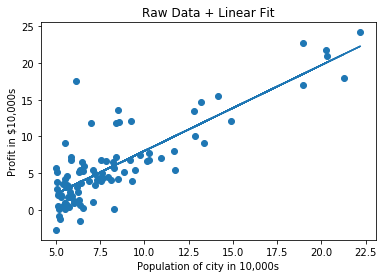

In [10]:
showPredictedPlot(X, y, theta)

<bold><p><span style="font-family: Arial; font-size:1.4em;color:blue;">Multiivariate Linear Regression </p></bold>

# *Reading dataset*

In [11]:
def read_data(dataset):
    data = pd.read_csv(dataset, sep=',', header=None)
    X = data.iloc[:,0:2].values
    y = data.iloc[:,2].values
    return X, y

In [12]:
X, y = read_data('ex1data2.txt')

# *Feature Normalisation*

In [13]:
def featureNormalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X = (X-mu)/sigma
    return X, mu, sigma

In [14]:
X, mu, sigma = featureNormalization(X) 

#  *Initializing parameters and adding intercept term*

In [15]:
X, y, theta, alpha, iterations = initialize(X, y, dims=[3,1], alpha_=0.01, iterations_=400)
print("Shape of X is: " + str(X.shape))
print("Shape of y is: " + str(y.shape))
print("Initial theta is: " + str(theta))

Shape of X is: (47, 3)
Shape of y is: (47, 1)
Initial theta is: [[0.]
 [0.]
 [0.]]


# *Compute Cost*

In [16]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = (1/2)*(np.mean(np.power((np.matmul(X, theta))-y, 2)))
    return J
J = computeCostMulti(X, y, theta)
J

65591548106.45744

# *Gradient Descent*

In [19]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros([num_iters, 1])
    for iter in range(0, num_iters):
        error = np.dot(X, theta) - y
        temp = np.dot(X.T, error)
        theta = theta - (alpha/m) * temp
        J_history[iter] = computeCostMulti(X, y, theta)
    return theta, J_history
theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)
theta

array([[340302.97100295],
       [107744.19899198],
       [ -4875.11193358]])

In [20]:
print(computeCostMulti(X, y, theta))

2044562883.3693335


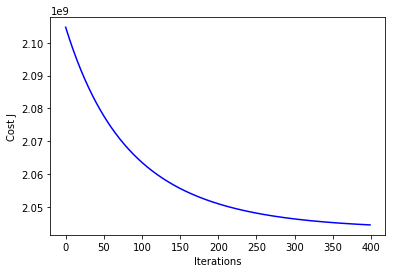

In [21]:
plt.plot(range(0, 400), J_history, color='blue', linestyle='solid')
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.show()

#  *Normal  Equation*

In [22]:
def read_data(dataset):
    data = pd.read_csv(dataset, sep=',', header=None)
    X = data.iloc[:,0:2].values
    y = data.iloc[:,2].values
    m = len(y)
    return X,y
X, y = read_data('ex1data2.txt')

In [23]:
X, y, theta, alpha, iterations = initialize(X, y, dims=[3,1], alpha_=0.01, iterations_=1500)
print("Shape of X is: " + str(X.shape))
print("Shape of y is: " + str(y.shape))
print("Initial theta is: " + str(theta))

Shape of X is: (47, 3)
Shape of y is: (47, 1)
Initial theta is: [[0.]
 [0.]
 [0.]]


In [24]:
def normal_equation(x, y):
    return np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
theta = normal_equation(X,y)
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [25]:
#Prediction
X_new = X[46]
print(np.dot(theta.T, X_new))

[230854.29304901]


In [26]:
#Prediction
r = np.array([1, 1811, 4])
print(np.matmul(r, theta))

[306756.3637394]
